In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import math

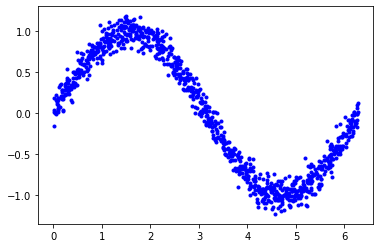

In [7]:
SAMPLES = 1000
# Set a "seed" value, so we get the same random numbers each time we run this
# notebook. Any number can be used here.
SEED = 1337
np.random.seed(SEED)
tf.random.set_seed(SEED)
x_values = np.random.uniform(low=0, high=2*math.pi, size=SAMPLES)
np.random.shuffle(x_values)
y_values = np.sin(x_values)
y_values += 0.1 * np.random.randn(*y_values.shape)
plt.plot(x_values, y_values, 'b.')
plt.show()

## Split the data for training, testing and validation

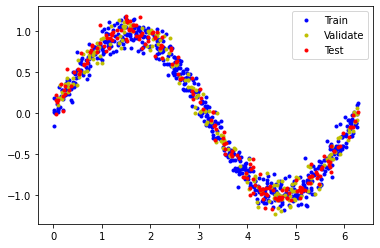

In [8]:
#60% data to be used for training now
TRAIN_SPLIT = int(0.6 * SAMPLES)

#20% for testing
TEST_SPLIT = int(0.2 * SAMPLES + TRAIN_SPLIT)
x_train, x_validate, x_test = np.split(x_values, [TRAIN_SPLIT, TEST_SPLIT])
y_train, y_validate, y_test = np.split(y_values, [TRAIN_SPLIT, TEST_SPLIT])


#Check they all add-up correctly
assert(x_train.size + x_validate.size + x_test.size) == SAMPLES
plt.plot(x_train, y_train, 'b.', label="Train")
plt.plot(x_validate, y_validate, 'y.', label="Validate")
plt.plot(x_test, y_test, 'r.', label="Test")
plt.legend()
plt.show()

# Tensorflor (model # 1) with ONE layer of neurons

In [ ]:
from tensorflow.keras import layers
model_1 = tf.keras.Sequential()
#total 16 neurons. activation is relu type
model_1.add(layers.Dense(16, activation='relu', input_shape = (1, )))
model_1.add(layers.Dense(1))
model_1.compile(optimizer = 'rmsprop', loss='mse', metrics = ['mae'])
model_1.summary()
history_1 = model_1.fit(x_train, y_train, epochs = 500, batch_size = 16, 
            validation_data = (x_validate, y_validate))

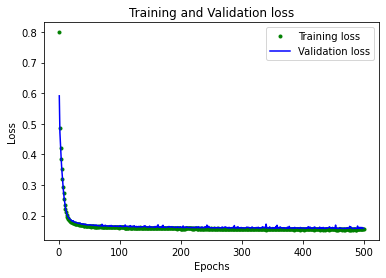

In [10]:
loss = history_1.history['loss']
val_loss = history_1.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'g.', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

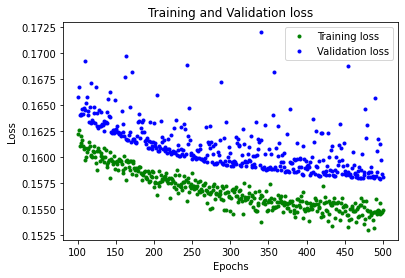

In [11]:
SKIP = 100
plt.plot(epochs[SKIP:], loss[SKIP:], 'g.', label='Training loss')
plt.plot(epochs[SKIP:], val_loss[SKIP:], 'b.', label='Validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

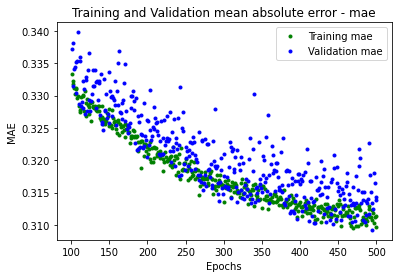

In [12]:
mae = history_1.history['mae']
val_mae = history_1.history['val_mae']
plt.plot(epochs[SKIP:], mae[SKIP:], 'g.', label='Training mae')
plt.plot(epochs[SKIP:], val_mae[SKIP:], 'b.', label='Validation mae')
plt.title('Training and Validation mean absolute error - mae')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()
plt.show()

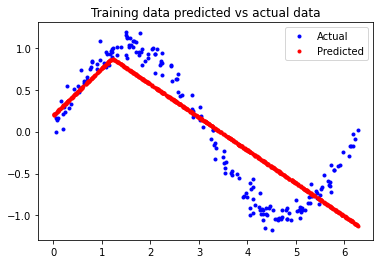

In [13]:
predictions = model_1.predict(x_train)
plt.clf()
plt.title('Training data predicted vs actual data')
plt.plot(x_test, y_test, 'b.', label='Actual')
plt.plot(x_train, predictions, 'r.', label='Predicted')
plt.legend()
plt.show()

# New model with two layers of neurons

In [ ]:
model_2 = tf.keras.Sequential()
model_2.add(layers.Dense(16, activation='relu', input_shape = (1, )))
model_2.add(layers.Dense(16, activation='relu'))
model_2.add(layers.Dense(1))

model_2.compile(optimizer = 'rmsprop', loss='mse', metrics = ['mae'])
model_2.summary()
history_2 = model_2.fit(x_train, y_train, epochs = 600, batch_size = 16, 
            validation_data = (x_validate, y_validate))

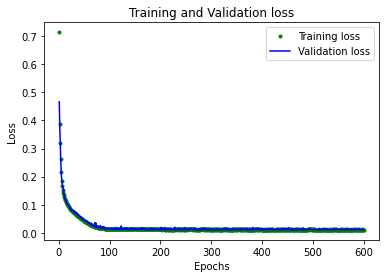

In [15]:
loss = history_2.history['loss']
val_loss = history_2.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'g.', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

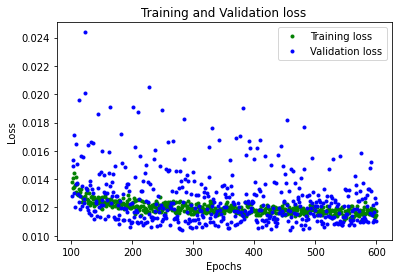

In [16]:
SKIP = 100
plt.clf()
plt.plot(epochs[SKIP:], loss[SKIP:], 'g.', label='Training loss')
plt.plot(epochs[SKIP:], val_loss[SKIP:], 'b.', label='Validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

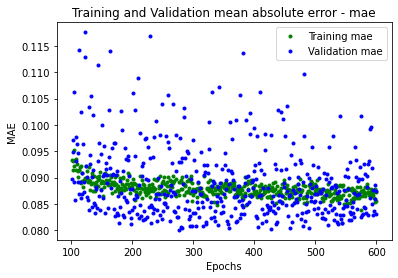

In [17]:
plt.clf()
mae = history_2.history['mae']
val_mae = history_2.history['val_mae']
plt.plot(epochs[SKIP:], mae[SKIP:], 'g.', label='Training mae')
plt.plot(epochs[SKIP:], val_mae[SKIP:], 'b.', label='Validation mae')
plt.title('Training and Validation mean absolute error - mae')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()
plt.show()

7/7 [==============================] - 0s 832us/step - loss: 0.0101 - mae: 0.0793


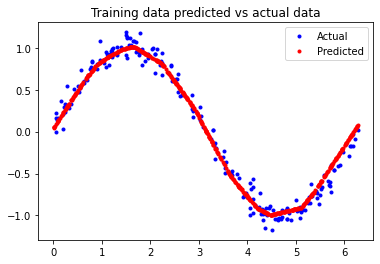

In [18]:
loss = model_2.evaluate(x_test, y_test)
predictions = model_2.predict(x_train)
plt.clf()
plt.title('Training data predicted vs actual data')
plt.plot(x_test, y_test, 'b.', label='Actual')
plt.plot(x_train, predictions, 'r.', label='Predicted')
plt.legend()
plt.show()

### Convert model to tflite WITHOUT quantization

In [19]:
converter = tf.lite.TFLiteConverter.from_keras_model(model_2)
tflite_model = converter.convert()

INFO:tensorflow:Assets written to: C:\Users\SYED\AppData\Local\Temp\tmpi6w9_71g\assets


In [20]:
#Save the model to disk
open("sine_model.tflite,", "wb").write(tflite_model)

2932

### Convert model with quantization

In [21]:
converter2 = tf.lite.TFLiteConverter.from_keras_model(model_2)
converter2.optimizations = [tf.lite.Optimize.DEFAULT]
def repr_data_generation():
    for value in x_test:
        yield[np.array(value, dtype=np.float32, ndmin=2)]

converter2.representative_dataset = repr_data_generation
tflite_model2 = converter2.convert()

INFO:tensorflow:Assets written to: C:\Users\SYED\AppData\Local\Temp\tmpfyrmx359\assets


INFO:tensorflow:Assets written to: C:\Users\SYED\AppData\Local\Temp\tmpfyrmx359\assets


In [22]:
#Save quantized model to disk
open("sine_model_quantized.tflite,", "wb").write(tflite_model2)

2752